In [1]:
#import pandas
import pandas as pd

In [2]:
import matplotlib.pyplot as plot
from sklearn import linear_model
import numpy as np


In [3]:
#import tensorflow
import tensorflow

In [4]:
#read data from csv file
dataRead = pd.read_csv(r'C:\Users\HP\Downloads\NIC.csv')

In [5]:
first = dataRead['id']

In [6]:
print(first)

0       911232910V
1       937370580V
2       937784210V
3       940491240V
4       942251610V
           ...    
5018    988190969V
5019    988330809V
5020    988501069V
5021    995150549V
5022    995291649V
Name: id, Length: 5023, dtype: object


In [7]:
#validate NIC numbers by regular expression 
validateIds = first[first.str.match('^[0-9]{9}V$')== True]
#remove null columns
nullRemoved = validateIds.dropna()

In [8]:
#remove V in NIC numbers
vRemoved = nullRemoved.str.replace("V", ' ')

In [9]:
#make string version of original column.
stringVersion = vRemoved.astype(str)


In [10]:
#print as string
print(stringVersion)

0       911232910 
1       937370580 
2       937784210 
3       940491240 
4       942251610 
           ...    
5018    988190969 
5019    988330809 
5020    988501069 
5021    995150549 
5022    995291649 
Name: id, Length: 5010, dtype: object


In [11]:
# make the new columns using string indexing
stringVersion1 = stringVersion.str[0:2]
stringVersion2= stringVersion.str[2:5]
stringVersion3 = stringVersion.str[5:8]
stringVersion4 = stringVersion.str[8:9]


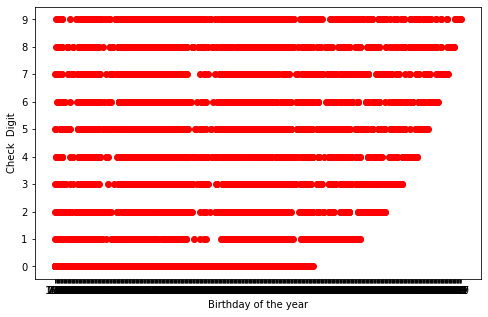

In [12]:
#plot Check Digit Vs. Birthday of the year
plot.figure(figsize=(8,5))
x_data, y_data = (stringVersion2, stringVersion4)
plot.plot(x_data, y_data, 'ro')
plot.ylabel('Check  Digit')
plot.xlabel('Birthday of the year')
plot.show()

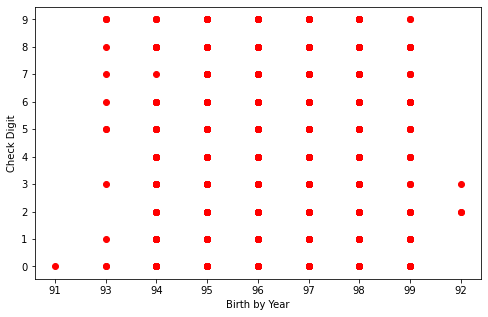

In [13]:
#plot Check Digit Vs.Birth by Year
plot.figure(figsize=(8,5))
x_data, y_data = (stringVersion1, stringVersion4)
plot.plot(x_data, y_data, 'ro')
plot.ylabel('Check Digit')
plot.xlabel('Birth by Year')
plot.show()

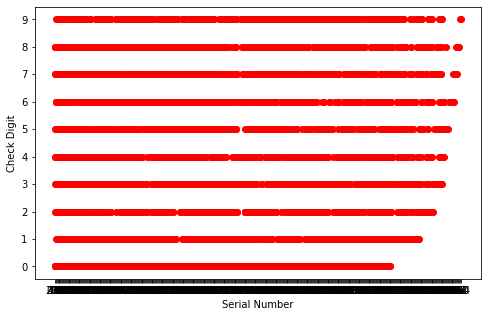

In [14]:
#plot Check Digit Vs.Serial Number
plot.figure(figsize=(8,5))
x_data, y_data = (stringVersion3, stringVersion4)
plot.plot(x_data, y_data, 'ro')
plot.ylabel('Check Digit')
plot.xlabel('Serial Number')
plot.show()

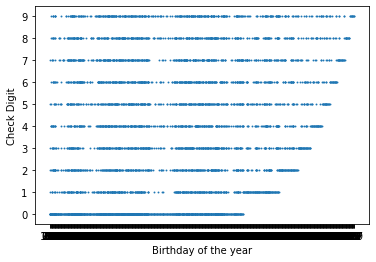

NameError: name 'StandardScaler' is not defined

In [25]:
x = stringVersion2
y = stringVersion4

plot.ylabel('Check Digit')
plot.xlabel('Birthday of the year')
plot.scatter(x,y, s=0.8)
plot.show()

x_train, x_test, y_train, y_test = train_test_split(x.values.reshape(-1, 1),y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting logistic regression to the training set
Classifier = LogisticRegression(random_state=0)
Classifier.fit(x.values.reshape(-1, 1), y)

# Predicting the test results
y_pred = Classifier.predict(x.values.reshape(-1, 1))
print("Accuracy score: ", accuracy_score(y, y_pred))